# Linnaeus University
## Introduction to Machine learning, 25VT-2DV516
## Assignment 1

**Name:** Karl Frisk

**Email:** kf222rj@student.lnu.se

## Introduction

In this assignment you will handle four exercises related to the k-Nearest Neighbors algorithm.
The main purpose is to get you up and running using Python, NumPy and Matplotlib. 
The library Scipy will be used specifically in Exercise 3, part 2.

## Submission Instructions

All exercises are individual. We expect you to submit a zip file with this notebook with your solutions and the MachineLearning.py with the models implemented. 
You must normalize your data before doing anything with your data.
When grading your assignments we will in addition to functionality also take into account code quality. 
We expect well structured and efficient solutions. 
Finally, keep all your files in a single folder named as username_A1 and submit a zipped version of this folder.

### Exercise 1: Models implementation and testing (All Mandatory)

1. Implement all the methods in the abstract classes **KNNRegressionModel** and **KNNClassificationModel** in the MachineLearningModel.py file. 
As the names suggest, you must implement the Regression (slide 30) and Classification (slide 24) versions of the KNN algorithm and you must follow the algorithms stated in the slides. 
* Both models must use the Euclidean distance as the distance function (*Tip: Code smart by implementing an auxiliary method _euclidian_distance() in the MachineLearningModel.py file*).
* The evaluate() function for the **KNNRegressionModel** must implement the Mean Squared Error (MSE)
* The evaluate() function for the **KNNClassificationModel** must count the number of correct predictions.

2. Use the *Polynomial200.csv* dataset to show that all your methods for the **KNNRegressionModel** is working as expected. You must produce a similar figure to the one in slide 31. Instructions to produce the figure are present in the slide. You must show the effects of using k = 3, 5, 7 and 9 and discuss your findings on the figure produced.

**Discuss your findings for this question below**

----- Your answer here -----


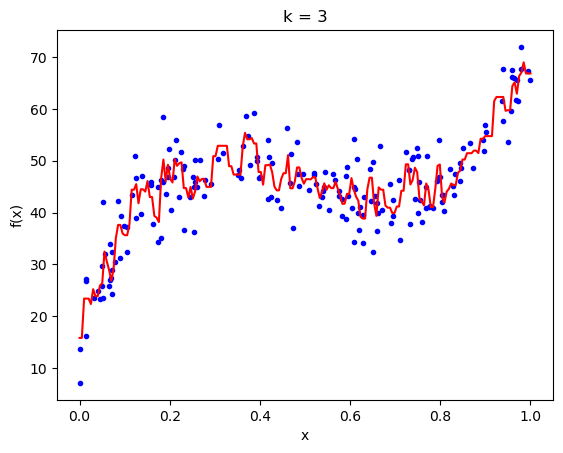

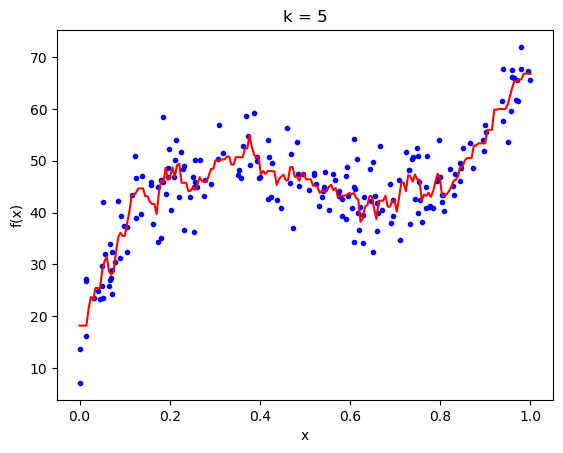

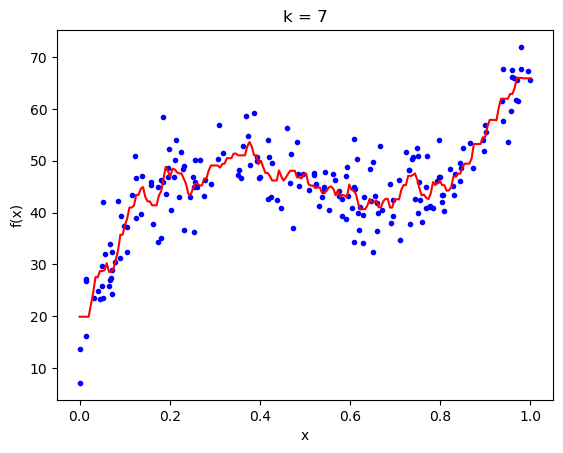

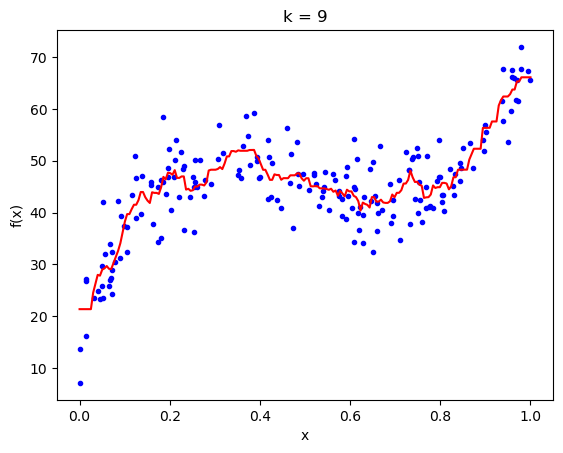

In [1]:
### Your code here ###

import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import KNNRegressionModel as KNN
from MachineLearningModel import csv_to_array as cta


data = 'Polynomial200.csv'

data = cta(data)

# Highest k-value
n = 9

# Normalization
data[:, 0] = (data[:, 0] - np.min(data[:, 0])) / (np.max(data[:, 0]) - np.min(data[:, 0]))

# Assigning in- and output data
X_train = data[:, 0].reshape(-1, 1)
y_train = data[:, 1].reshape(-1, 1)

# Creating an array for testing
X_test = np.linspace(0, 1, 200)

# Iterating over k-values
for k in range(3, n + 1, 2):

    # Initiating a class instance
    knn = KNN(k)

    # Fitting the training data
    knn.fit(X_train, y_train)

    # Predicting the graph
    y_predicted = knn.predict(X_test)

    # Plotting the graphs
    plt.plot(X_train, y_train, 'b.')
    plt.plot(X_test, y_predicted, 'r-')
    plt.title(f"k = {k}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

## Findings

The lower k values seem to be a lot more noisy and perhaps not as robust as when we increase k to sort of even out the curve to accomodate a larger set of values and thus creating a more robust model.


3. Use the *IrisDataset.csv* dataset to show that all your methods for the **KNNClassificationModel** is working as expected. You must produce a similar figure to the one in slide 28. Instructions on how to produce the figure are given in the slide. You must choose 2 input variables only to produce the figure (they do not need to match the figure in the slide). You must show the effects of using k = 3, 5, 7, and 9 and discuss the figure produced.

**Tips**

* Check the function *np.meshgrid* from numpy to create the samples.
* Check the function *plt.contourf* for generating the countours. 
* There are many tutorials online to produce this figure. Find one that most suits you.

**Discuss your findings for this question below**

----- Your answer here -----

In [ ]:
### Your code here ###

import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import KNNClassificationModel as KNN
from MachineLearningModel import csv_to_array as cta

data = 'IrisDataset.csv'

data = cta(data)

# Highest k-value
n = 9

# Normalizing the input-data
for i in range(4):
    data[:, i] = data[:, i] - np.min(data[:, i]) / (np.max(data[:, i]) - np.min(data[:, i]))

# Feature multiplication assuming square leaves
X = np.c_[data[:, 0]*data[:, 1], data[:, 2]*data[:, 3]]

y = data[:, 4]

# Iterating over k-values
for k in range(3, n + 1, 2):

    # Initiating a class instance
    knn = KNN(k)

    # Fitting training data
    knn.fit(X, y)

    # Predicting test data
    results = knn.predict(X)

    # Generating a heatmap for decision boundary visualization
    XX, YY, heatmap = knn.decision_boundary(X, resolution=200)

    # Plotting the heatmaps and the points with their respective k-value
    plt.contourf(XX, YY, heatmap, cmap='cividis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cividis', edgecolor='k')
    plt.title(f"k = {k}")
    plt.show()

## Findings

The lower k values seem to be performing better on the training data but the region borders are a lot more noisy and perhaps the model is not as robust as when k increases.

### Exercise 2: KNN Regression (Mandatory)

1. (Mandatory) Create a procedure to repeat 10 times the following strategy.
* Use the values for k = 3, 5, 7, 9, 11, 13 and 15.
* Split your dataset randomly into 80% for training, and 20% testing. Use 10 different seeds for splitting the data.
* Evaluate (MSE implemented in your class) your **KNNRegressionModel** for each k in the **test set** and store the result. 
* Plot a barchart with these results.

Which k gives the best regression? Motivate your answer!

**Discuss your findings for this question below**

----- Your answer here -----

In [ ]:
### Your code here ###

import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import KNNRegressionModel as KNN
from MachineLearningModel import csv_to_array as cta

data = 'Polynomial200.csv'

data = cta(data)

# Highest k-value
n = 25

# Normalization
data[:, 0] = data[:, 0] - np.min(data[:, 0]) / (np.max(data[:, 0]) - np.min(data[:, 0]))

mse_dict = {}

# Number of different seeds
s = 10

# Iterating over seeds
for seed in [k for k in range(s)]:

    np.random.seed(seed)

    indexes = np.arange(data.shape[0])
    np.random.shuffle(indexes)

    # Splitting data (80:20)
    split_idx = int(0.8 * len(data))
    
    X_train, X_test = data[indexes[:split_idx], 0], data[indexes[split_idx:], 0]
    y_train, y_test = data[indexes[:split_idx], 1], data[indexes[split_idx:], 1]
    
    # Iterating over different k-values
    for k in range(3, n + 1, 2):

        # Initiating a class instance
        knn = KNN(k)

        # Fitting the training data
        knn.fit(X_train, y_train)

        # Predicting test data
        y_predicted = knn.predict(X_test)

        # Evaluating the model
        metric = knn.evaluate(y_test, y_predicted)

        # Saving all evaluations to compare for later
        if k in mse_dict:
            mse_dict[k] += metric
        else:
            mse_dict[k] = metric

# Calculating the mean
for c in mse_dict:
    mse_dict[c] /= n

# Plotting the MSE-bars
plt.bar(mse_dict.keys(), mse_dict.values())
plt.xticks(list(mse_dict.keys()))
plt.xlabel('k-values in kNN')
plt.ylabel(f'average MSE for {s} trials')
plt.show()

## Findings

It seems that MSE takes on a U-shaped curve that in this case has a minimum at k = 13 or 15. Clearly, if we only consider MSE, k = 13 or 15 would be best. Too low or too high k-values seem to miss the sweetspot.

### Exercise 3: KNN Classification (1 Mandatory , 1 Non-Mandatory)

1. **(Mandatory)** Using the **IrisDataset.csv**, find the best combination of two features that produces the best model using **KNNClassificationModel**.
* You must try all combinations of two features, and for k = 3, 5, 7, and 9.
* You must use plots to support your answer.

**Discuss your findings for this question below**

----- Your answer here -----


In [ ]:
### Your code here ###

import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import KNNClassificationModel as KNN
from MachineLearningModel import csv_to_array as cta

data = 'IrisDataset.csv'

data = cta(data)

# Highest k-value
n = 9

# Normalizing the input-data
for i in range(4):
    data[:, i] = data[:, i] - np.min(data[:, i]) / (np.max(data[:, i]) - np.min(data[:, i]))

# Assigning the output-data
y = data[:, 4]

# Manually creating different combinations
permutations = [[0, 1, 2, 3], [0, 2, 1, 3], [0, 3, 1, 2]]

transformation_dict = {0:'SepalLength', 1:'SepalWidth', 2:'PetalLength', 3:'PetalWidth'}

best_within_k = {}

# Iterating over k-values
for k in range(3, n + 1, 2):

    result_dict = {}

    # Iterating over different combinations
    for a, b, c, d in permutations:   

        # Combining Data-columns given different combinations
        X = np.c_[data[:, a]*data[:, b], data[:, c]*data[:, d]]

        # Splitting data (80:20)
        indexes = np.arange(data.shape[0])

        X_train, X_test = X[indexes[:int(0.8*len(indexes))]], X[indexes[int(0.8*len(indexes))]:]
        y_train, y_test = y[indexes[:int(0.8*len(indexes))]], y[indexes[int(0.8*len(indexes))]:]

        # Initiating class instance
        knn = KNN(k)

        # Fitting training data
        knn.fit(X_train, y_train)

        # Predicting test data
        y_predicted = knn.predict(X_test)

        # Evaluating the model
        metric = knn.evaluate(y_test, y_predicted)

        # Saving all evaluations to compare for later
        result_dict[f'{transformation_dict[a]}*{transformation_dict[b]}'] = metric * 100
    
    value_list = list(result_dict.values())

    # Plotting all the different combinations' evaluation-score with the same k-values
    plt.bar(result_dict.keys(), result_dict.values())
    plt.xticks(rotation=-60)
    plt.title(f'Accuracy of kNNClassification with k = {k}')
    plt.ylabel('accuracy in %')
    for x in range(len(result_dict)):
        plt.text(x - 0.1, 40, str(round(value_list[x], 2)), size=15)
    plt.tight_layout()
    plt.show()

    # Computing the best results within the k-value
    best_combo = (max(result_dict, key=result_dict.get), k)

    print(f'The best combo among k = {k} is {best_combo[0]}')

## Findings

It seem that the best combination of features is SepalLength * SepalWidth.

2. **(Non-mandatory)** Implement a new Class called **FastKNNClassificationModel**. This method should be faster than your regular implementation. This can be done by using a faster data structure to look for the closest neighbors faster. In this assignment, you must build the KDTree with the the training data and then search for the neighbors using it.

* You must use this implementation of KDTree from Scipy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html
* The methods needed for your implementation are only the *constructor* (to build the KDTree) and the method *query* to find the k-neighbors.
* You must design an experiment using the **IrisDataset.csv** with **all features** to show that your new implementation is faster than your implementation of **KNNClassificationModel**.
* For example, you can measure the time using of each prediction, for each classifier, and plot the average time to give a decision for entries. Also, measure how this would increase/decrease with the increment of the input parameter *k*. 
* Use a plot(s) from matplotlib to support your answer.

**Discuss your findings for this question below**

----- Your answer here -----

In [ ]:
### Your code here ###

## Exercise 4: MNIST k-NN classification (Non-mandatory)

In this final exercise, we will use k-NN for classifying handwritten digits using the very famous MNIST dataset. Input to the algorithm is an image (28x28 pixel) with a handwritten digit (0-9) and the output should be a classification 0-9. The dataset and a description of it is available at http://yann.lecun.com/exdb/mnist/. Google MNIST Python to learn how to access it. The objective is to use your k-NN classifier to perform as good as possible on recognizing handwritten images. Describe your effort and what you found out to be the best k to lower the test error. The complete dataset has 60,000 digits for training and 10,000 digits for testing. Hence the computations might be heavy, so start of by a smaller subset rather than using the entire dataset. The final testing should (if possible) be done for the full test set but we will accept solutions that use "only" 10,000 digits for training and 1,000 digits for testing.
The description of this exercise is deliberately vague as you are supposed to, on your own, find a suitable way to solve this problem in detail. This is why it is important that you document your effort and progress in your report. **You must use your implementations of KNN for classification. If you successfully finished Exercise 3, part 2, it is advisable to use your FastKNNClassificationModel**

In [ ]:
### Your code here ###